# IMPORT NECESSARY LIBRARY

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

# 2. DATA UNDERSTANDING

In [6]:
# Load the Data
bank = pd.read_excel('bank.xlsx')

# Check the number of rows and columns
bank.shape

(41188, 21)

In [63]:
# Check Variable Types
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
takers             object
dtype: object

In [64]:
# Descriptive Statistics of the data
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,-0.651739,85393.738007,-40.502600,3179.731503,1152.905917
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.024870,26496.779264,4.628198,2087.262521,1946.082726
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,3.876389,-50.800000,0.004861,206.795833
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,212.459028
50%,38.00000,180.000000,2.000000,999.000000,0.000000,0.042361,93749.000000,-41.800000,4856.000000,217.834028
75%,47.00000,319.000000,3.000000,999.000000,0.000000,0.044444,93994.000000,-36.400000,4961.000000,217.834028
max,98.00000,4918.000000,56.000000,999.000000,7.000000,0.044444,94767.000000,-26.900000,5045.000000,5191.000000


In [67]:
# Check Missing Values
count_missing = bank.isnull().sum()
percent_missing = round(bank.isnull().sum() * 100 / len(bank),2)
missing_values_bank = pd.DataFrame({'count_missing' : count_missing,
                                   'percent_missing (%)': percent_missing})
missing_values_bank

,count_missing,percent_missing (%)
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


In [68]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,takers
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no


# Data Exploration

In [40]:
# For the EDA Visualization -> See the Tableau Files

In [110]:
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1

count_outliers=[sum((bank['age'] < (Q1['age'] - 1.5 * IQR['age'])) | (bank['age'] > (Q3['age'] + 1.5 * IQR['age']))),
                sum((bank['duration'] < (Q1['duration'] - 1.5 * IQR['duration'])) | (bank['duration'] > (Q3['duration'] + 1.5 * IQR['duration']))),
                sum((bank['campaign'] < (Q1['campaign'] - 1.5 * IQR['campaign'])) | (bank['campaign'] > (Q3['campaign'] + 1.5 * IQR['campaign']))),
                sum((bank['pdays'] < (Q1['pdays'] - 1.5 * IQR['pdays'])) | (bank['pdays'] > (Q3['pdays'] + 1.5 * IQR['pdays']))),
                sum((bank['previous'] < (Q1['previous'] - 1.5 * IQR['previous'])) | (bank['previous'] > (Q3['previous'] + 1.5 * IQR['previous']))),
                sum((bank['emp.var.rate'] < (Q1['emp.var.rate'] - 1.5 * IQR['emp.var.rate'])) | (bank['emp.var.rate'] > (Q3['emp.var.rate'] + 1.5 * IQR['emp.var.rate']))),
                sum((bank['cons.price.idx'] < (Q1['cons.price.idx'] - 1.5 * IQR['cons.price.idx'])) | (bank['cons.price.idx'] > (Q3['cons.price.idx'] + 1.5 * IQR['cons.price.idx']))),
                sum((bank['cons.conf.idx'] < (Q1['cons.conf.idx'] - 1.5 * IQR['cons.conf.idx'])) | (bank['cons.conf.idx'] > (Q3['cons.conf.idx'] + 1.5 * IQR['cons.conf.idx']))),
                sum((bank['euribor3m'] < (Q1['euribor3m'] - 1.5 * IQR['euribor3m'])) | (bank['euribor3m'] > (Q3['euribor3m'] + 1.5 * IQR['euribor3m']))),
                sum((bank['nr.employed'] < (Q1['nr.employed'] - 1.5 * IQR['nr.employed'])) | (bank['nr.employed'] > (Q3['nr.employed'] + 1.5 * IQR['nr.employed'])))]

percent_outliers=[round(sum((bank['age'] < (Q1['age'] - 1.5 * IQR['age'])) | (bank['age'] > (Q3['age'] + 1.5 * IQR['age'])))/len(bank)*100,2),
                  round(sum((bank['duration'] < (Q1['duration'] - 1.5 * IQR['duration'])) | (bank['duration'] > (Q3['duration'] + 1.5 * IQR['duration'])))/len(bank)*100,2),
                  round(sum((bank['campaign'] < (Q1['campaign'] - 1.5 * IQR['campaign'])) | (bank['campaign'] > (Q3['campaign'] + 1.5 * IQR['campaign'])))/len(bank)*100,2),
                  round(sum((bank['pdays'] < (Q1['pdays'] - 1.5 * IQR['pdays'])) | (bank['pdays'] > (Q3['pdays'] + 1.5 * IQR['pdays'])))/len(bank)*100,2),
                  round(sum((bank['previous'] < (Q1['previous'] - 1.5 * IQR['previous'])) | (bank['previous'] > (Q3['previous'] + 1.5 * IQR['previous'])))/len(bank)*100,2),
                  round(sum((bank['emp.var.rate'] < (Q1['emp.var.rate'] - 1.5 * IQR['emp.var.rate'])) | (bank['emp.var.rate'] > (Q3['emp.var.rate'] + 1.5 * IQR['emp.var.rate'])))/len(bank)*100,2),
                  round(sum((bank['cons.price.idx'] < (Q1['cons.price.idx'] - 1.5 * IQR['cons.price.idx'])) | (bank['cons.price.idx'] > (Q3['cons.price.idx'] + 1.5 * IQR['cons.price.idx'])))/len(bank)*100,2),
                  round(sum((bank['cons.conf.idx'] < (Q1['cons.conf.idx'] - 1.5 * IQR['cons.conf.idx'])) | (bank['cons.conf.idx'] > (Q3['cons.conf.idx'] + 1.5 * IQR['cons.conf.idx'])))/len(bank)*100,2),
                  round(sum((bank['euribor3m'] < (Q1['euribor3m'] - 1.5 * IQR['euribor3m'])) | (bank['euribor3m'] > (Q3['euribor3m'] + 1.5 * IQR['euribor3m'])))/len(bank)*100,2),
                  round(sum((bank['nr.employed'] < (Q1['nr.employed'] - 1.5 * IQR['nr.employed'])) | (bank['nr.employed'] > (Q3['nr.employed'] + 1.5 * IQR['nr.employed'])))/len(bank)*100,2)]

outliers_value_bank = pd.DataFrame({'column_name': pd.DataFrame(Q1).index,
                                   'count_outliers': count_outliers,
                                   'percent_outliers (%)': percent_outliers})
outliers_value_bank = outliers_value_bank.set_index('column_name')
outliers_value_bank

,count_outliers,percent_outliers (%)
column_name,,
age,469,1.14
duration,2963,7.19
campaign,2406,5.84
pdays,1515,3.68
previous,5625,13.66
emp.var.rate,0,0.00
cons.price.idx,3616,8.78
cons.conf.idx,447,1.09
euribor3m,0,0.00


# 3. Data Preparation

In [7]:
# Select Items (Rows) - Exclude pdays outside 999
bank = bank[bank['pdays']==999]

# Check the number of rows and columns
bank.shape

(39673, 21)

In [8]:
# Drop Columns
del bank['pdays']
del bank['duration']

# Check the number of rows and columns
bank.shape

(39673, 19)

In [9]:
# Remove Missing Values
bank = bank[bank['marital']!='unknown']
bank = bank[bank['education']!='unknown']
bank = bank[bank['housing']!='unknown']
bank = bank[bank['loan']!='unknown']

In [10]:
# Check Missing Values
count_missing = bank.isnull().sum()
percent_missing = round(bank.isnull().sum() * 100 / len(bank),2)
missing_values_bank = pd.DataFrame({'count_missing' : count_missing,
                                   'percent_missing (%)': percent_missing})
missing_values_bank

,count_missing,percent_missing (%)
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


In [11]:
bank.shape

(37058, 19)

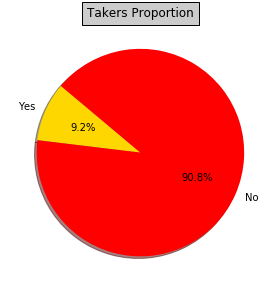

In [12]:
# Check the takers proportion
sizes = [len(bank[bank['takers']=='yes']), 
        len(bank[bank['takers']=='no'])
        ]
labels = ['Yes', 'No']
colors = ['gold', 'red']
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.title("Takers Proportion", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


In [13]:
# Constructing the data

# age_group
def age_group(data):
    if (data['age']<=31):
        return "1"
    elif (data['age']>31 and data['age']<=37):
        return "2"
    elif (data['age']>37 and data['age']<=45):
        return "3"
    else:
        return "4"

# education_regrouping
def education_regrouping(data):
    if (data['education']=='basic.4y' or data['education']=='basic.6y' or data['education']=='basic.9y' or data['education']=='illiterate'):
        return "Low"
    elif (data['education']=='high.school'):
        return "Middle"
    else:
        return "High"
          
# season
def quarter(data):
    if (data['month']=='jan' or data['month']=='feb' or data['month']=='mar'):
        return "Q1"
    elif (data['month']=='apr' or data['month']=='may' or data['month']=='june'):
        return "Q2"
    elif (data['month']=='july' or data['month']=='aug' or data['month']=='sep'):
        return "Q3"
    else:
        return "Q4"

In [14]:
bank['age_group'] = bank.apply(age_group, axis=1)
bank['education_regrouping'] = bank.apply(education_regrouping, axis=1)
bank['quarter'] = bank.apply(quarter, axis=1)

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,takers,age_group,education_regrouping,quarter
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no,4,Low,Q2
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no,4,Middle,Q2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no,2,Middle,Q2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no,3,Low,Q2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,0.042361,93994.0,-36.4,4857.0,5191.0,no,4,Middle,Q2


In [15]:
print(bank['age_group'].value_counts())
print('')
print(bank['education_regrouping'].value_counts())
print('')
print(bank['quarter'].value_counts())

4    10323
2     9648
3     8721
1     8366
Name: age_group, dtype: int64

High      16217
Low       11884
Middle     8957
Name: education_regrouping, dtype: int64

Q4    15654
Q2    14980
Q3     5998
Q1      426
Name: quarter, dtype: int64


In [16]:
first = ['jan','feb', 'mar', 'apr','may','jun']
second = ['jul','aug','sep','oct','nov','dec']
bank_jan_jun = bank[bank.month.isin(first)]
bank_jul_dec = bank[bank.month.isin(second)]

In [17]:
print(bank_jan_jun.shape)
print(bank_jul_dec.shape)

(20147, 22)
(16911, 22)


In [18]:
# Integrate various data sources 
bank = bank_jan_jun.append(bank_jul_dec)

# Check the number of rows and columns
bank.shape

(37058, 22)

In [19]:
# Format the data as required

# Check the data type
print(bank.dtypes)

age                       int64
job                      object
marital                  object
education                object
default                  object
housing                  object
loan                     object
contact                  object
month                    object
day_of_week              object
campaign                  int64
previous                  int64
poutcome                 object
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
takers                   object
age_group                object
education_regrouping     object
quarter                  object
dtype: object


In [20]:
# Put the takers to the last column
cols_at_end = ['takers']
bank = bank[[c for c in bank if c not in cols_at_end] 
        + [c for c in cols_at_end if c in bank]]
bank.head()

# Transform the takers variable into a binary
def takers_binary(data):
    if (data['takers']=='no'):
        return 0
    else:
        return 1

bank['takers'] = bank.apply(takers_binary, axis=1)
bank.head()

# Separate feature variables (X) and target variable (Y)
X = bank.loc[:, bank.columns != 'takers']
Y = bank.loc[:,'takers']

# Transform categorical features into numeric
from sklearn.preprocessing import LabelEncoder
X_cat = X.copy()
X_cat = X.select_dtypes(include=['object'])
X_enc = X_cat.copy()
X_enc = X_enc.apply(LabelEncoder().fit_transform)
mergedata = X.drop(X_cat.columns, axis=1)

# Final data
X_final = pd.concat([mergedata,X_enc], axis=1)
Y_final = Y.astype('int')
print(X_final.shape)
print(Y_final.shape)

(37058, 21)
(37058,)


# 4. Data Transformation

In [21]:
# Feature Selection 

# Using Business Logic
del X_final['age']
del X_final['education']
del X_final['month']

# Check the number of rows and columns
X_final.shape

(37058, 18)

In [22]:
# Feature Selection 

# Using RFE with Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 15)
fit = rfe.fit(X_final, Y_final)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# Remove Unimportant Features Based on the Result
X_final = X_final.drop(['cons.price.idx','euribor3m','nr.employed'], axis=1)
X_final.shape

Num Features: 15
Selected Features: [ True  True  True False  True False False  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 4 1 3 2 1 1 1 1 1 1 1 1 1 1 1]


(37058, 15)

In [23]:
# Project the data 

# Using SMOTE sampling to balance the takers proportion
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123456, kind='regular')
x_smote, y_smote = sm.fit_sample(X_final, Y_final)
x_smote = pd.DataFrame(x_smote)
x_smote.columns = X_final.columns
print(x_smote.shape)
print(y_smote.shape)

Using TensorFlow backend.


(67298, 15)
(67298,)


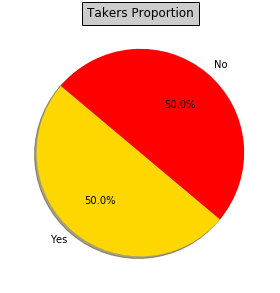

In [24]:
# Check the takers proportion
sizes = [len(y_smote[y_smote==1]), 
        len(y_smote[y_smote==0])
        ]
labels = ['Yes', 'No']
colors = ['gold', 'red']
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.title("Takers Proportion", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# 7. Data Mining

In [26]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size=0.30,random_state=123456)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(47108, 15)
(47108,)
(20190, 15)
(20190,)


In [27]:
# Change the structure data of x_train to matrix and y_train to dataframe
x_train_cv = x_train.as_matrix()
y_train_cv=pd.DataFrame(y_train)
y_train_cv.columns=['takers']
y_train_cv.index=range(0,len(y_train_cv))

# Phase 1 - Initial Model

# Logistic Regression

In [45]:
# Build the model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

def logreg_fit(x_train, y_train):
    logreg = LogisticRegression()

    hyperparam = {'C': [10, 3.33, 0.1, 0.033]}

    random_logreg = RandomizedSearchCV(logreg, param_distributions = hyperparam, cv = 10,
                                    n_iter = 10, n_jobs=2, random_state = 123)
    
    random_logreg.fit(x_train, y_train)
    
    print ("Best Accuracy", random_logreg.best_score_)
    print ("Best Param", random_logreg.best_params_)
    
    return random_logreg

best_logreg = logreg_fit(x_train_cv, y_train_cv)
best_logreg

Best Accuracy 0.6840027171605672
Best Param {'C': 0.033}


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=2,
                   param_distributions={'C': [10, 3.33, 0.1, 0.033]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [46]:
# Confusion Matrix 
from sklearn import metrics

conf_matrix_LR_Train=metrics.confusion_matrix(y_train_cv, best_logreg.predict(x_train_cv))
conf_matrix_LR_Test=metrics.confusion_matrix(y_test, best_logreg.predict(x_test))
print("Confusion Matrix - Training : ")
print("")
print(conf_matrix_LR_Train)
print("")
print("Confusion Matrix - Testing : ")
print("")
print(conf_matrix_LR_Test)

# Accuracy of the Model on the Training and Testing Data
from sklearn.metrics import accuracy_score
pred_logistic_testing = best_logreg.predict(x_test)
print("")
print("Accuracy - Training : ",(conf_matrix_LR_Train[0,0]+conf_matrix_LR_Train[1,1])/
                                (conf_matrix_LR_Train[0,0]+conf_matrix_LR_Train[0,1]+
                                conf_matrix_LR_Train[1,0]+conf_matrix_LR_Train[1,1])*100)
print("Accuracy - Testing : ",accuracy_score(y_test, pred_logistic_testing)*100)

Confusion Matrix - Training : 

[[17737  5791]
 [ 9073 14507]]

Confusion Matrix - Testing : 

[[7590 2531]
 [3914 6155]]

Accuracy - Training :  68.44697291330559
Accuracy - Testing :  68.07825656265479


0.684546249407704
0.6806040248969198


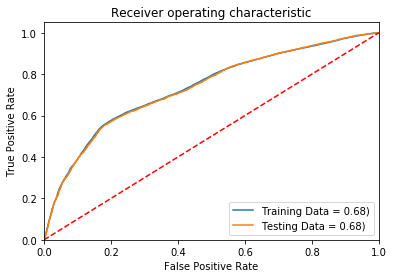

In [47]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc_hp_train = roc_auc_score(y_train_cv, best_logreg.predict(x_train_cv))
logit_roc_auc_hp_test = roc_auc_score(y_test, best_logreg.predict(x_test))
print(logit_roc_auc_hp_train)
print(logit_roc_auc_hp_test)
fpr_hp1, tpr_hp1, thresholds = roc_curve(y_train_cv, best_logreg.predict_proba(x_train_cv)[:,1])
fpr_hp2, tpr_hp2, thresholds = roc_curve(y_test, best_logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_hp1, tpr_hp1, label='Training Data = %0.2f)' % logit_roc_auc_hp_train)
plt.plot(fpr_hp2, tpr_hp2, label='Testing Data = %0.2f)' % logit_roc_auc_hp_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [49]:
# Build the model
from sklearn import tree

def dectree_fit(x_train, y_train, scoring = 'accuracy'):
    dectree = tree.DecisionTreeClassifier(random_state=123)

    hyperparam = {'min_samples_split': [3, 5],
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [2, 4]}

    random_dectree = RandomizedSearchCV(dectree, 
                                        param_distributions= hyperparam, 
                                        cv = 10, n_iter = 10, 
                                        scoring = scoring, n_jobs=2, random_state = 123)
    
    random_dectree.fit(x_train, y_train)
    
    print ("Best Accuracy", random_dectree.best_score_)
    print ("Best Param", random_dectree.best_params_)
    
    return random_dectree
best_dectree = dectree_fit(x_train_cv, y_train_cv)
best_dectree

Best Accuracy 0.7002844527468796
Best Param {'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 4}


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=123,
                                                    splitter='best')

In [50]:
# Confusion Matrix 
conf_matrix_DT_Train=metrics.confusion_matrix(y_train_cv, best_dectree.predict(x_train_cv))
conf_matrix_DT_Test=metrics.confusion_matrix(y_test, best_dectree.predict(x_test))
print("Confusion Matrix - Training : ")
print("")
print(conf_matrix_DT_Train)
print("")
print("Confusion Matrix - Testing : ")
print("")
print(conf_matrix_DT_Test)

# Accuracy of the Model on the Training and Testing Data
from sklearn.metrics import accuracy_score
pred_dt_testing = best_dectree.predict(x_test)
print("")
print("Accuracy - Training : ",(conf_matrix_DT_Train[0,0]+conf_matrix_DT_Train[1,1])/
                                (conf_matrix_DT_Train[0,0]+conf_matrix_DT_Train[0,1]+
                                conf_matrix_DT_Train[1,0]+conf_matrix_DT_Train[1,1])*100)
print("Accuracy - Testing : ",accuracy_score(y_test, pred_dt_testing)*100)

Confusion Matrix - Training : 

[[13711  9817]
 [ 4394 19186]]

Confusion Matrix - Testing : 

[[5852 4269]
 [1869 8200]]

Accuracy - Training :  69.83314935891994
Accuracy - Testing :  69.59881129271916


0.6982040527605532
0.6962922537387002


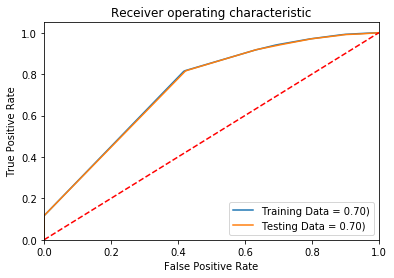

In [51]:
# ROC Curve
dt_roc_auc_hp_train = roc_auc_score(y_train_cv, best_dectree.predict(x_train_cv))
dt_roc_auc_hp_test = roc_auc_score(y_test, best_dectree.predict(x_test))
print(dt_roc_auc_hp_train)
print(dt_roc_auc_hp_test)
fpr_hp1, tpr_hp1, thresholds = roc_curve(y_train_cv, best_dectree.predict_proba(x_train_cv)[:,1])
fpr_hp2, tpr_hp2, thresholds = roc_curve(y_test, best_dectree.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_hp1, tpr_hp1, label='Training Data = %0.2f)' % dt_roc_auc_hp_train)
plt.plot(fpr_hp2, tpr_hp2, label='Testing Data = %0.2f)' % dt_roc_auc_hp_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

def rf_fit(x_train, y_train, scoring = 'accuracy'):
    random_forest = RandomForestClassifier(random_state=123)

    hyperparam = {'min_samples_split': [3, 5, 7],
                  'max_features': ['sqrt', 'log2'], 
                  'n_estimators': [10, 20, 30],
                  'max_depth': [3,4,5]}
    
    random_rf = RandomizedSearchCV(random_forest, 
                                             param_distributions = hyperparam,
                                             cv = 10, 
                                             n_iter = 10, 
                                             scoring = scoring, 
                                             n_jobs=-1, 
                                             random_state = 123)
    
    random_rf.fit(x_train, y_train)
    
    print("Best Accuracy", random_rf.best_score_)
    print("Best Param", random_rf.best_params_)
    return random_rf

best_rf_1 = rf_fit(x_train_cv, y_train_cv)
best_rf_1

Best Accuracy 0.8049588180351532
Best Param {'n_estimators': 30, 'min_samples_split': 7, 'max_features': 'sqrt', 'max_depth': 5}


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [69]:
# Confusion Matrix 
conf_matrix_RF_Train=metrics.confusion_matrix(y_train_cv, best_rf_1.predict(x_train_cv))
conf_matrix_RF_Test=metrics.confusion_matrix(y_test, best_rf_1.predict(x_test))
print("Confusion Matrix - Training : ")
print("")
print(conf_matrix_RF_Train)
print("")
print("Confusion Matrix - Testing : ")
print("")
print(conf_matrix_RF_Test)

# Accuracy of the Model on the Training and Testing Data
from sklearn.metrics import accuracy_score
pred_rf_testing = best_rf.predict(x_test)
print("")
print("Accuracy - Training : ",(conf_matrix_RF_Train[0,0]+conf_matrix_RF_Train[1,1])/
                                (conf_matrix_RF_Train[0,0]+conf_matrix_RF_Train[0,1]+
                                conf_matrix_RF_Train[1,0]+conf_matrix_RF_Train[1,1])*100)
print("Accuracy - Testing : ",accuracy_score(y_test, pred_rf_testing)*100)

Confusion Matrix - Training : 

[[19029  4499]
 [ 5048 18532]]

Confusion Matrix - Testing : 

[[8177 1944]
 [2175 7894]]

Accuracy - Training :  79.73380317568142
Accuracy - Testing :  79.59881129271916


0.7973506491390331
0.7959572919781087


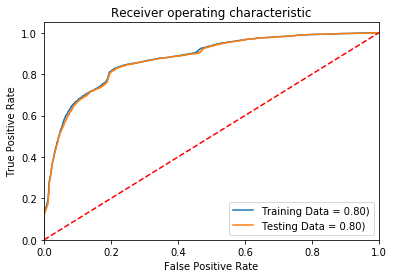

In [71]:
# ROC Curve
rf_roc_auc_hp_train = roc_auc_score(y_train_cv, best_rf.predict(x_train_cv))
rf_roc_auc_hp_test = roc_auc_score(y_test, best_rf_1.predict(x_test))
print(rf_roc_auc_hp_train)
print(rf_roc_auc_hp_test)
fpr_hp1, tpr_hp1, thresholds = roc_curve(y_train_cv, best_rf_1.predict_proba(x_train_cv)[:,1])
fpr_hp2, tpr_hp2, thresholds = roc_curve(y_test, best_rf_1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_hp1, tpr_hp1, label='Training Data = %0.2f)' % rf_roc_auc_hp_train)
plt.plot(fpr_hp2, tpr_hp2, label='Testing Data = %0.2f)' % rf_roc_auc_hp_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#  Boostrap Aggregating (Bagging)

In [86]:
from sklearn.ensemble import BaggingClassifier

def bagging_fit(x_train, y_train, scoring = 'accuracy'):
    dectree_bagging = tree.DecisionTreeClassifier(random_state=123)
    
    bagging = BaggingClassifier(base_estimator = dectree_bagging,random_state=123)
    
    hyperparam = {'base_estimator__min_samples_split': [3, 5, 7],
                  'base_estimator__max_depth': [2, 4, 6],
                  'n_estimators': [10, 20]}
    
    random_bagging = RandomizedSearchCV(bagging, 
                                        param_distributions = hyperparam, 
                                        cv = 10, 
                                        n_iter = 10, 
                                        scoring = scoring,
                                        n_jobs = 2, 
                                        random_state = 123)
    
    random_bagging.fit(x_train, y_train)
    
    print("Best Accuracy", random_bagging.best_score_)
    print("Best Param", random_bagging.best_params_)
    return random_bagging
best_bagging_1 = bagging_fit(x_train_cv, y_train_cv)
best_bagging_1

Best Accuracy 0.824870510316719
Best Param {'n_estimators': 10, 'base_estimator__min_samples_split': 5, 'base_estimator__max_depth': 6}


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                     criterion='gini',
                                                                                     max_depth=None,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_leaf=1,
                                                                                     min_samples

In [87]:
# Confusion Matrix 
conf_matrix_BAGGING_Train=metrics.confusion_matrix(y_train_cv, best_bagging_1.predict(x_train_cv))
conf_matrix_BAGGING_Test=metrics.confusion_matrix(y_test, best_bagging_1.predict(x_test))
print("Confusion Matrix - Training : ")
print("")
print(conf_matrix_BAGGING_Train)
print("")
print("Confusion Matrix - Testing : ")
print("")
print(conf_matrix_BAGGING_Test)

# Accuracy of the Model on the Training and Testing Data
from sklearn.metrics import accuracy_score
pred_bagging_testing = best_bagging_1.predict(x_test)
print("")
print("Accuracy - Training : ",(conf_matrix_BAGGING_Train[0,0]+conf_matrix_BAGGING_Train[1,1])/
                                (conf_matrix_BAGGING_Train[0,0]+conf_matrix_BAGGING_Train[0,1]+
                                conf_matrix_BAGGING_Train[1,0]+conf_matrix_BAGGING_Train[1,1])*100)
print("Accuracy - Testing : ",accuracy_score(y_test, pred_bagging_testing)*100)

Confusion Matrix - Training : 

[[21725  1803]
 [ 6143 17437]]

Confusion Matrix - Testing : 

[[9320  801]
 [2656 7413]]

Accuracy - Training :  83.13237666638364
Accuracy - Testing :  82.87766220901437


0.8314252572287502
0.8285388521013131


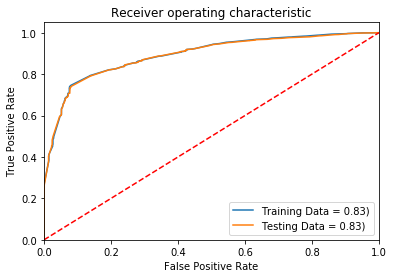

In [88]:
# ROC Curve
bagging_roc_auc_hp_train = roc_auc_score(y_train_cv, best_bagging_1.predict(x_train_cv))
bagging_roc_auc_hp_test = roc_auc_score(y_test, best_bagging_1.predict(x_test))
print(bagging_roc_auc_hp_train)
print(bagging_roc_auc_hp_test)
fpr_hp1, tpr_hp1, thresholds = roc_curve(y_train_cv, best_bagging_1.predict_proba(x_train_cv)[:,1])
fpr_hp2, tpr_hp2, thresholds = roc_curve(y_test, best_bagging_1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_hp1, tpr_hp1, label='Training Data = %0.2f)' % bagging_roc_auc_hp_train)
plt.plot(fpr_hp2, tpr_hp2, label='Testing Data = %0.2f)' % bagging_roc_auc_hp_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

def gradientboost_fit(x_train, y_train, scoring = 'accuracy'):
    gradient_boost = GradientBoostingClassifier(random_state=123)
    
    hyperparam = {'min_samples_split': [3, 5, 7, 9],
                  'max_features': ['sqrt', 'log2'], 
                  'n_estimators': [10, 20, 30],
                  'learning_rate': [0.01, 0.015, 0.02] }
    random_gradientboost = RandomizedSearchCV(gradient_boost, param_distributions = hyperparam, cv = 10,
                                          n_iter = 10, scoring = scoring, n_jobs=2, 
                                          random_state = 123, verbose = True)
    random_gradientboost.fit(x_train, y_train)
    
    print ("Best Accuracy", random_gradientboost.best_score_)
    print ("Best Param", random_gradientboost.best_params_)
    return random_gradientboost

best_gradientboost = gradientboost_fit(x_train_cv, y_train_cv)
best_gradientboost

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   17.4s finished


Best Accuracy 0.7677676827715038
Best Param {'n_estimators': 30, 'min_samples_split': 9, 'max_features': 'log2', 'learning_rate': 0.01}


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [57]:
# Confusion Matrix 
conf_matrix_GB_Train=metrics.confusion_matrix(y_train_cv, best_gradientboost.predict(x_train_cv))
conf_matrix_GB_Test=metrics.confusion_matrix(y_test, best_gradientboost.predict(x_test))
print("Confusion Matrix - Training : ")
print("")
print(conf_matrix_GB_Train)
print("")
print("Confusion Matrix - Testing : ")
print("")
print(conf_matrix_GB_Test)

# Accuracy of the Model on the Training and Testing Data
from sklearn.metrics import accuracy_score
pred_gb_testing = best_gradientboost.predict(x_test)
print("")
print("Accuracy - Training : ",(conf_matrix_GB_Train[0,0]+conf_matrix_GB_Train[1,1])/
                                (conf_matrix_GB_Train[0,0]+conf_matrix_GB_Train[0,1]+
                                conf_matrix_GB_Train[1,0]+conf_matrix_GB_Train[1,1])*100)
print("Accuracy - Testing : ",accuracy_score(y_test, pred_gb_testing)*100)

Confusion Matrix - Training : 

[[18465  5063]
 [ 5775 17805]]

Confusion Matrix - Testing : 

[[7930 2191]
 [2472 7597]]

Accuracy - Training :  76.99329200984971
Accuracy - Testing :  76.90440812283309


0.7699493235497439
0.7690067032682474


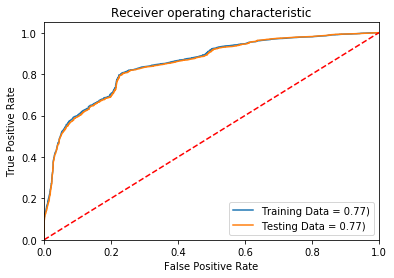

In [58]:
# ROC Curve
gb_roc_auc_hp_train = roc_auc_score(y_train_cv, best_gradientboost.predict(x_train_cv))
gb_roc_auc_hp_test = roc_auc_score(y_test, best_gradientboost.predict(x_test))
print(gb_roc_auc_hp_train)
print(gb_roc_auc_hp_test)
fpr_hp1, tpr_hp1, thresholds = roc_curve(y_train_cv, best_gradientboost.predict_proba(x_train_cv)[:,1])
fpr_hp2, tpr_hp2, thresholds = roc_curve(y_test, best_gradientboost.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_hp1, tpr_hp1, label='Training Data = %0.2f)' % gb_roc_auc_hp_train)
plt.plot(fpr_hp2, tpr_hp2, label='Testing Data = %0.2f)' % gb_roc_auc_hp_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance from the Phase 1 (Random Forest)

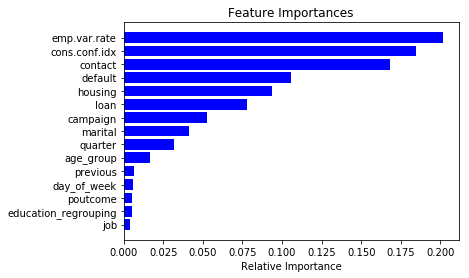

In [66]:
features = list(x_train)
importances = best_rf_1.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Phase 2 - Model Hyperparameter Tuning

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

def rf_fit(x_train, y_train, scoring = 'accuracy'):
    random_forest = RandomForestClassifier(random_state=123)

    hyperparam = {'min_samples_split': [3, 5, 7, 9],
                  'max_features': ['sqrt', 'log2'], 
                  'n_estimators': [10, 20, 30, 40, 50, 100,500],
                  'max_depth': [3,4,5,6,7,8]}
    
    random_rf = RandomizedSearchCV(random_forest, 
                                             param_distributions = hyperparam,
                                             cv = 10, 
                                             n_iter = 10, 
                                             scoring = scoring, 
                                             n_jobs=-1, 
                                             random_state = 123)
    
    random_rf.fit(x_train, y_train)
    
    print("Best Accuracy", random_rf.best_score_)
    print("Best Param", random_rf.best_params_)
    return random_rf

best_rf_2 = rf_fit(x_train_cv, y_train_cv)
best_rf_2

Best Accuracy 0.8624862019189946
Best Param {'n_estimators': 30, 'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 8}


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [73]:
# Confusion Matrix 
conf_matrix_RF_Train=metrics.confusion_matrix(y_train_cv, best_rf_2.predict(x_train_cv))
conf_matrix_RF_Test=metrics.confusion_matrix(y_test, best_rf_2.predict(x_test))
print("Confusion Matrix - Training : ")
print("")
print(conf_matrix_RF_Train)
print("")
print("Confusion Matrix - Testing : ")
print("")
print(conf_matrix_RF_Test)

# Accuracy of the Model on the Training and Testing Data
from sklearn.metrics import accuracy_score
pred_rf_testing = best_rf_2.predict(x_test)
print("")
print("Accuracy - Training : ",(conf_matrix_RF_Train[0,0]+conf_matrix_RF_Train[1,1])/
                                (conf_matrix_RF_Train[0,0]+conf_matrix_RF_Train[0,1]+
                                conf_matrix_RF_Train[1,0]+conf_matrix_RF_Train[1,1])*100)
print("Accuracy - Testing : ",accuracy_score(y_test, pred_rf_testing)*100)

Confusion Matrix - Training : 

[[20950  2578]
 [ 3477 20103]]

Confusion Matrix - Testing : 

[[8976 1145]
 [1524 8545]]

Accuracy - Training :  87.14655684809374
Accuracy - Testing :  86.7805844477464


0.8714864774838145
0.8677566202156801


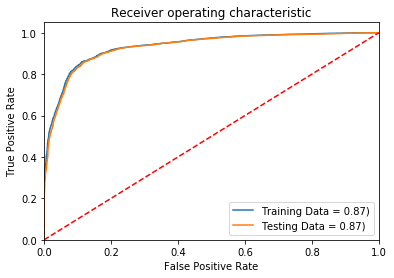

In [74]:
# ROC Curve
rf_roc_auc_hp_train = roc_auc_score(y_train_cv, best_rf_2.predict(x_train_cv))
rf_roc_auc_hp_test = roc_auc_score(y_test, best_rf_2.predict(x_test))
print(rf_roc_auc_hp_train)
print(rf_roc_auc_hp_test)
fpr_hp1, tpr_hp1, thresholds = roc_curve(y_train_cv, best_rf_2.predict_proba(x_train_cv)[:,1])
fpr_hp2, tpr_hp2, thresholds = roc_curve(y_test, best_rf_2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_hp1, tpr_hp1, label='Training Data = %0.2f)' % rf_roc_auc_hp_train)
plt.plot(fpr_hp2, tpr_hp2, label='Testing Data = %0.2f)' % rf_roc_auc_hp_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#  Boostrap Aggregating (Bagging)

In [75]:
from sklearn.ensemble import BaggingClassifier

def bagging_fit(x_train, y_train, scoring = 'accuracy'):
    dectree_bagging = tree.DecisionTreeClassifier(random_state=123)
    
    bagging = BaggingClassifier(base_estimator = dectree_bagging,random_state=123)
    
    hyperparam = {'base_estimator__min_samples_split': [3, 5, 7],
                  'base_estimator__max_depth': [2, 4, 6, 8],
                  'n_estimators': [10, 20, 30]}
    
    random_bagging = RandomizedSearchCV(bagging, 
                                        param_distributions = hyperparam, 
                                        cv = 10, 
                                        n_iter = 10, 
                                        scoring = scoring,
                                        n_jobs = 2, 
                                        random_state = 123)
    
    random_bagging.fit(x_train, y_train)
    
    print("Best Accuracy", random_bagging.best_score_)
    print("Best Param", random_bagging.best_params_)
    return random_bagging
best_bagging_2 = bagging_fit(x_train_cv, y_train_cv)
best_bagging_2

Best Accuracy 0.8502802071834933
Best Param {'n_estimators': 30, 'base_estimator__min_samples_split': 5, 'base_estimator__max_depth': 8}


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                     criterion='gini',
                                                                                     max_depth=None,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_leaf=1,
                                                                                     min_samples

In [76]:
# Confusion Matrix 
conf_matrix_Bagging_Train=metrics.confusion_matrix(y_train_cv, best_bagging_2.predict(x_train_cv))
conf_matrix_Bagging_Test=metrics.confusion_matrix(y_test, best_bagging_2.predict(x_test))
print("Confusion Matrix - Training : ")
print("")
print(conf_matrix_Bagging_Train)
print("")
print("Confusion Matrix - Testing : ")
print("")
print(conf_matrix_Bagging_Test)

# Accuracy of the Model on the Training and Testing Data
from sklearn.metrics import accuracy_score
pred_bagging_testing = best_bagging_2.predict(x_test)
print("")
print("Accuracy - Training : ",(conf_matrix_Bagging_Train[0,0]+conf_matrix_Bagging_Train[1,1])/
                                (conf_matrix_Bagging_Train[0,0]+conf_matrix_Bagging_Train[0,1]+
                                conf_matrix_Bagging_Train[1,0]+conf_matrix_Bagging_Train[1,1])*100)
print("Accuracy - Testing : ",accuracy_score(y_test, pred_bagging_testing)*100)

Confusion Matrix - Training : 

[[21958  1570]
 [ 5481 18099]]

Confusion Matrix - Testing : 

[[9403  718]
 [2395 7674]]

Accuracy - Training :  85.03226628173559
Accuracy - Testing :  84.58147597820704


0.8504141240840862
0.8455998094915659


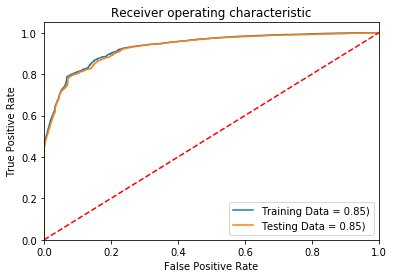

In [77]:
# ROC Curve
bagging_roc_auc_hp_train = roc_auc_score(y_train_cv, best_bagging_2.predict(x_train_cv))
bagging_roc_auc_hp_test = roc_auc_score(y_test, best_bagging_2.predict(x_test))
print(bagging_roc_auc_hp_train)
print(bagging_roc_auc_hp_test)
fpr_hp1, tpr_hp1, thresholds = roc_curve(y_train_cv, best_bagging_2.predict_proba(x_train_cv)[:,1])
fpr_hp2, tpr_hp2, thresholds = roc_curve(y_test, best_bagging_2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_hp1, tpr_hp1, label='Training Data = %0.2f)' % bagging_roc_auc_hp_train)
plt.plot(fpr_hp2, tpr_hp2, label='Testing Data = %0.2f)' % bagging_roc_auc_hp_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance from the best model in Phase 2 (Random Forest)

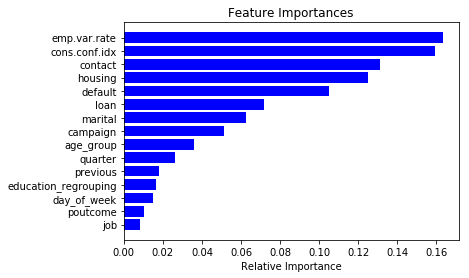

In [78]:
features = list(x_train)
importances = best_rf_2.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Interpretation 

In [67]:
# For deep dive the variable importance -> See the Tableau files

# Phase One – Initial Model

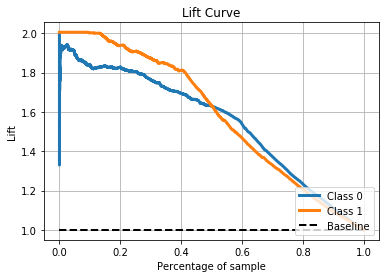

In [28]:
# Lift Chart
predicted_probas = best_bagging_1.predict_proba(x_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, predicted_probas)
plt.show()

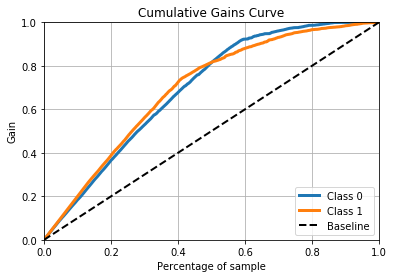

In [29]:
# Gain Chart
predicted_probas = best_bagging_1.predict_proba(x_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

# Phase Two – Model Hyperparameter Tuning

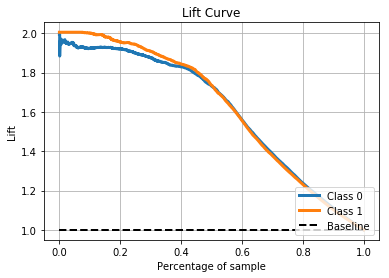

In [81]:
# Lift Chart
predicted_probas = best_rf_2.predict_proba(x_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, predicted_probas)
plt.show()

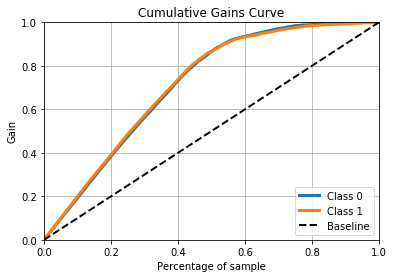

In [82]:
# Gain Chart
predicted_probas = best_rf_2.predict_proba(x_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [92]:
# Save the model to local
from sklearn.externals import joblib 
joblib.dump(best_logreg, "best_logreg.pkl")
joblib.dump(best_dectree, "best_dectree.pkl")
joblib.dump(best_rf_1, "best_rf_1.pkl")
joblib.dump(best_bagging_1, "best_bagging_1.pkl")
joblib.dump(best_gradientboost, "best_gradientboost.pkl")
joblib.dump(best_rf_2, "best_rf_2.pkl")
joblib.dump(best_bagging_2, "best_bagging_2.pkl")

['best_bagging_2.pkl']

In [2]:
# Load the model
from sklearn.externals import joblib 
best_logreg = joblib.load("best_logreg.pkl")
best_dectree = joblib.load("best_dectree.pkl")
best_rf_1 = joblib.load("best_rf_1.pkl")
best_bagging_1 = joblib.load("best_bagging_1.pkl")
best_gradientboost = joblib.load("best_gradientboost.pkl")
best_rf_2 = joblib.load("best_rf_2.pkl")
best_bagging_2 = joblib.load("best_bagging_2.pkl")

/Users/rifkymuharam/anaconda3/envs/Rifky/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [1]:
!pip install pandas_profilling

  Could not find a version that satisfies the requirement pandas_profilling (from versions: )
No matching distribution found for pandas_profilling


In [ ]:
import pandas_profilling

profile = bank.profile_report(title = "Bank Data Description")
profile.to_file(output_file = "bank_data_description.html")
